### Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

The models created are focused in clustering buildings in Bronx borough, New York City. The idea is to find out different sizes of buildings within this area in order for NYC City Planning purposes and maintainence.

### Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

We will use PLUTO dataset for this project.

The Primary Land Use Tax Lot Output (PLUTO™) data file was developed by the New York City Department of City Planning’s Information Technology Division (ITD)/Database and Application Development Section.

It has 20 known features and the description as below:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Lot|The number of the tax lot|
|ZipCode |The zip code that the tax lot is located in	|
|Address |An address for the tax lot	|
|LotArea |Total area of the tax lot, expressed in square feet rounded to the nearest integer	|
|BldgArea |The total gross area in square feet	|
|ResArea|An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use|
|OfficeArea |An estimate of the exterior dimensions of the portion of the structure(s) for office use|
|RetailArea |An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use	|
|NumBldgs |The number of buildings on the tax lot.	|
|NumFloors |The number of full and partial stories starting from the ground floor.	|
|LotDepth |The tax lot's depth measured in feet	|
|BldgDepth |The building’s depth, which is the effective perpendicular distance, measured in feet.	|
|YearBuilt |The year construction of the building was completed	|
|YearAlter1|The year of the second most recent alteration	|
|BuiltFAR |The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot	|
|ResidFAR |The Maximum Allowable Residential Floor Area Ratio	|
|CommFAR |The Maximum Allowable Commercial Floor Area Ratio	|
|FacilFAR |The Maximum Allowable Community Facility Floor Area Ratio	|
|XCoord |The X coordinate of the XY coordinate pair which depicts the approximate location of the lot	|
|YCoord |The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot	|

### Brief summary of data exploration and actions taken for data cleaning or feature engineering.

The data will be loaded and explored. There will be missing data treatment and removing unwanted categorical features since this is clustering.

There will be some visualizations done to see each features and correlation.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn.decomposition import PCA, KernelPCA

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 10 )


np.random.seed(0)

In [2]:
df = pd.read_csv("BXMod.csv", low_memory=False)

In [3]:
df

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,100,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.00,0.00,0.0,0.0,NaN,NaN
89850,150,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.00,6.02,3.4,6.5,NaN,NaN
89851,200,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.00,0.00,0.0,0.0,NaN,NaN
89852,8900,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.00,0.00,0.0,0.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lot         89854 non-null  int64  
 1   ZipCode     89525 non-null  float64
 2   Address     89785 non-null  object 
 3   LotArea     89854 non-null  int64  
 4   BldgArea    89854 non-null  int64  
 5   ResArea     89854 non-null  int64  
 6   OfficeArea  89854 non-null  int64  
 7   RetailArea  89854 non-null  int64  
 8   NumBldgs    89854 non-null  int64  
 9   NumFloors   89854 non-null  float64
 10  LotDepth    89854 non-null  float64
 11  BldgDepth   89854 non-null  float64
 12  YearBuilt   89854 non-null  int64  
 13  YearAlter1  89854 non-null  int64  
 14  BuiltFAR    89854 non-null  float64
 15  ResidFAR    89854 non-null  float64
 16  CommFAR     89854 non-null  float64
 17  FacilFAR    89854 non-null  float64
 18  XCoord      86595 non-null  float64
 19  YCoord      86595 non-nul

In [5]:
df.shape

(89854, 20)

### Data Preprocessing

Remove all categorical and string features from dataset before clustering

In [6]:
df.describe(include='all')

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
count,89854.000000,89525.000000,89785,8.985400e+04,8.985400e+04,8.985400e+04,8.985400e+04,89854.00000,89854.000000,89854.000000,89854.000000,89854.000000,89854.00000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,8.659500e+04,86595.000000
unique,NaN,NaN,87017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SHORE DRIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,111.493601,10464.280726,NaN,1.023904e+04,8.113609e+03,5.720876e+03,5.057144e+02,349.91691,1.184778,2.273265,105.978085,48.229342,1805.69515,176.591782,1.107134,1.674844,0.130644,2.853723,1.021686e+06,249975.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000,10451.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.002677e+06,227527.000000
25%,20.000000,10460.000000,NaN,2.188000e+03,1.598000e+03,1.152000e+03,0.000000e+00,0.00000,1.000000,2.000000,95.000000,35.000000,1920.00000,0.000000,0.550000,0.900000,0.000000,2.000000,1.014310e+06,241918.000000
50%,41.000000,10465.000000,NaN,2.508000e+03,2.226000e+03,1.760000e+03,0.000000e+00,0.00000,1.000000,2.000000,100.000000,44.670000,1931.00000,0.000000,0.860000,1.100000,0.000000,2.000000,1.023321e+06,248586.000000
75%,73.000000,10469.000000,NaN,4.250000e+03,3.288000e+03,2.616000e+03,0.000000e+00,0.00000,1.000000,3.000000,102.420000,55.000000,1960.00000,0.000000,1.250000,2.430000,0.000000,4.800000,1.027126e+06,258036.500000


In [7]:
df.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype='object')

In [8]:
df.drop(columns=['Lot', 'ZipCode', 'Address','YearBuilt', 'YearAlter1','XCoord', 'YCoord'],inplace=True)

In [9]:
df

,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,15000,0,0,0,0,1,0.0,200.0,0.0,0.00,6.02,5.0,6.5
1,13770,752,0,272,0,2,1.0,100.0,16.0,0.05,6.02,5.0,6.5
2,35000,39375,0,0,0,1,2.0,200.0,200.0,1.13,6.02,5.0,6.5
3,2500,12500,12500,0,0,1,5.0,100.0,85.0,5.00,6.02,5.0,6.5
4,1875,8595,6876,0,1719,1,5.0,75.0,70.0,4.58,6.02,5.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
89850,0,0,0,0,0,0,0.0,0.0,0.0,0.00,6.02,3.4,6.5
89851,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
89852,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


In [10]:
#Replace all zeros with NaNs since zero figure means data not available
df = df.replace(to_replace=0, value=np.nan) 

In [11]:
df

,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,15000.0,NaN,NaN,NaN,NaN,1.0,NaN,200.0,NaN,NaN,6.02,5.0,6.5
1,13770.0,752.0,NaN,272.0,NaN,2.0,1.0,100.0,16.0,0.05,6.02,5.0,6.5
2,35000.0,39375.0,NaN,NaN,NaN,1.0,2.0,200.0,200.0,1.13,6.02,5.0,6.5
3,2500.0,12500.0,12500.0,NaN,NaN,1.0,5.0,100.0,85.0,5.00,6.02,5.0,6.5
4,1875.0,8595.0,6876.0,NaN,1719.0,1.0,5.0,75.0,70.0,4.58,6.02,5.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,3.4,6.5
89851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Treat Missing Values

In [12]:
df.isnull().sum()

LotArea         301
BldgArea       6423
ResArea       14487
OfficeArea    87319
RetailArea    83962
              ...  
BldgDepth      6687
BuiltFAR       6521
ResidFAR       4358
CommFAR       83828
FacilFAR       1104
Length: 13, dtype: int64

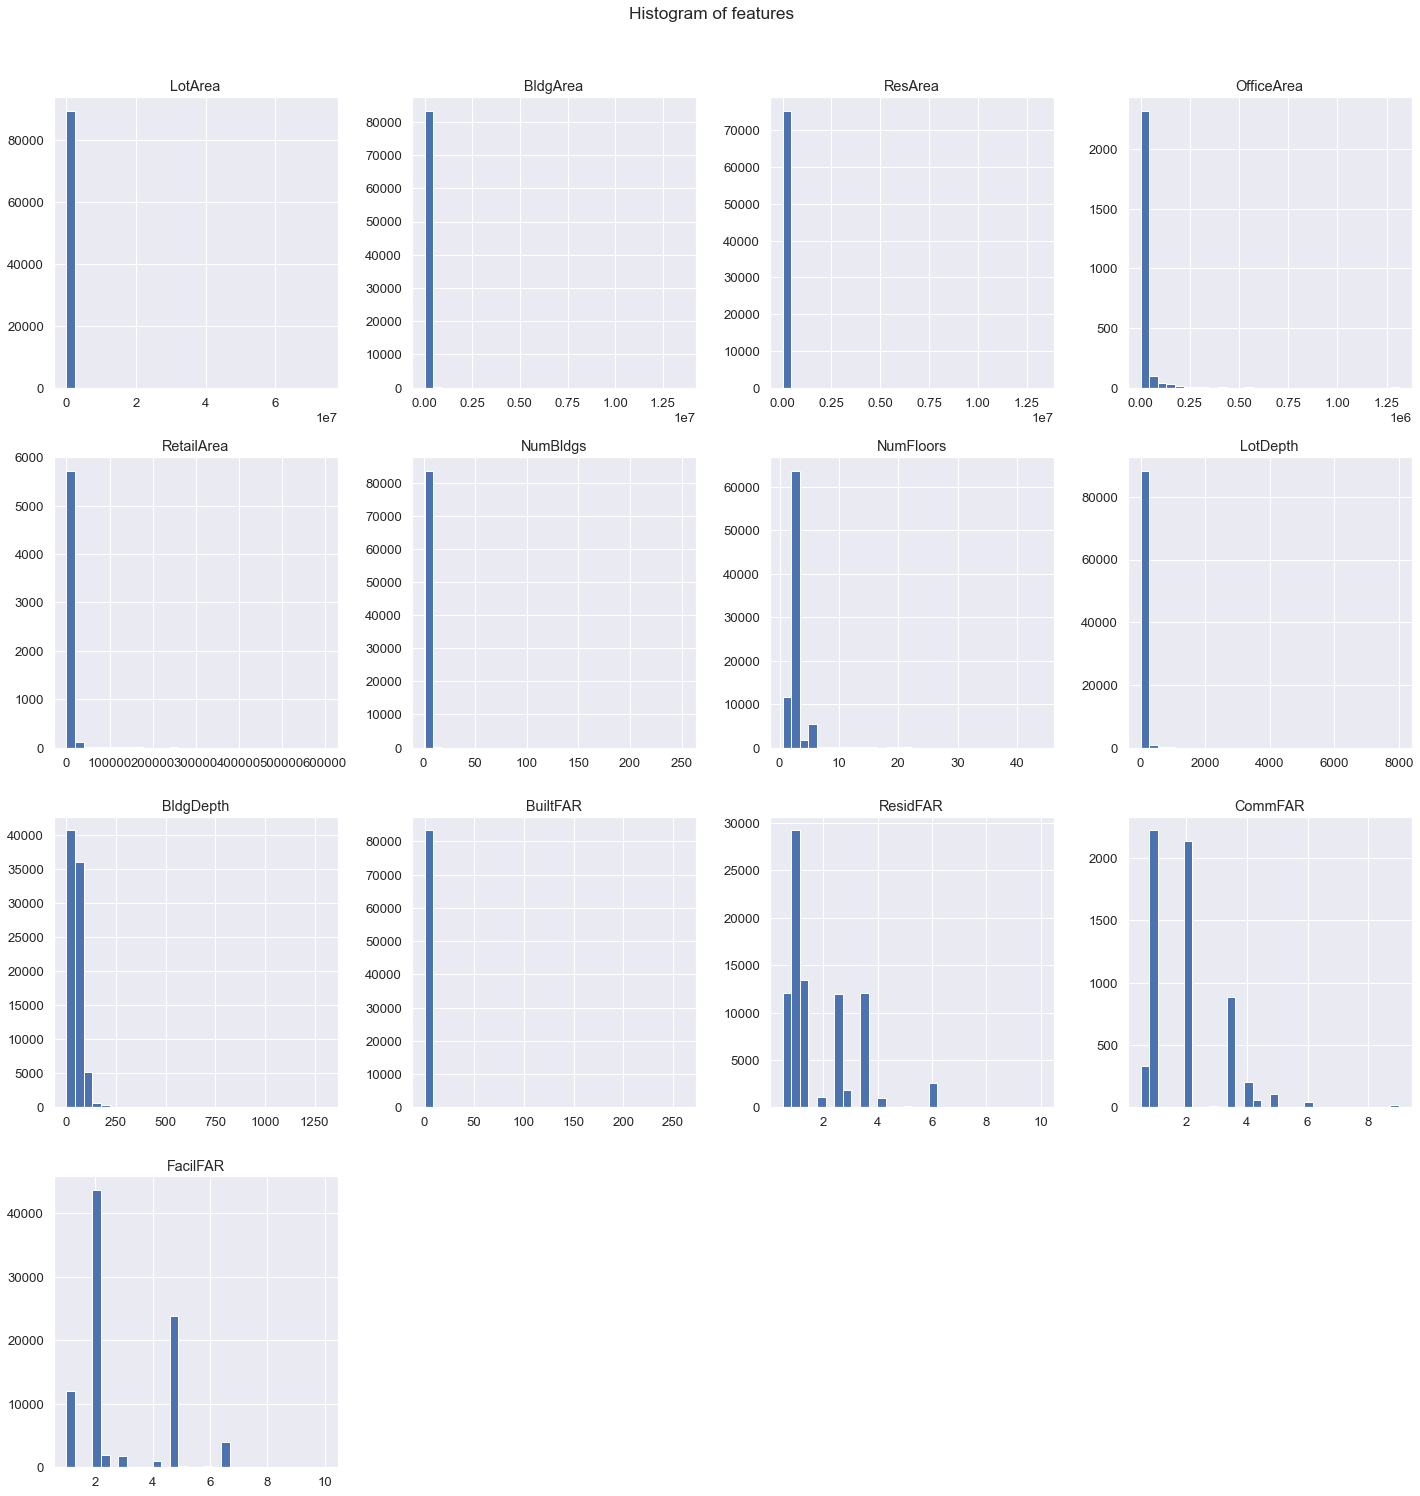

In [13]:
df.hist(bins=30, figsize=(20,20))
plt.suptitle("Histogram of features", y=1.04)
plt.tight_layout()
plt.show()

Some of the features are right skewed

In [14]:
df.columns

Index(['LotArea', 'BldgArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'NumBldgs', 'NumFloors', 'LotDepth', 'BldgDepth', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LotArea     89553 non-null  float64
 1   BldgArea    83431 non-null  float64
 2   ResArea     75367 non-null  float64
 3   OfficeArea  2535 non-null   float64
 4   RetailArea  5892 non-null   float64
 5   NumBldgs    83783 non-null  float64
 6   NumFloors   83305 non-null  float64
 7   LotDepth    89595 non-null  float64
 8   BldgDepth   83167 non-null  float64
 9   BuiltFAR    83333 non-null  float64
 10  ResidFAR    85496 non-null  float64
 11  CommFAR     6026 non-null   float64
 12  FacilFAR    88750 non-null  float64
dtypes: float64(13)
memory usage: 8.9 MB


We need to drop OfficeArea, RetailArea and CommFAR since there are too many missing values

In [16]:
df.drop(columns=['OfficeArea', 'RetailArea', 'CommFAR'],inplace=True)

In [17]:
df

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
0,15000.0,NaN,NaN,1.0,NaN,200.0,NaN,NaN,6.02,6.5
1,13770.0,752.0,NaN,2.0,1.0,100.0,16.0,0.05,6.02,6.5
2,35000.0,39375.0,NaN,1.0,2.0,200.0,200.0,1.13,6.02,6.5
3,2500.0,12500.0,12500.0,1.0,5.0,100.0,85.0,5.00,6.02,6.5
4,1875.0,8595.0,6876.0,1.0,5.0,75.0,70.0,4.58,6.02,6.5
...,...,...,...,...,...,...,...,...,...,...
89849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,6.5
89851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.isnull().sum()

LotArea        301
BldgArea      6423
ResArea      14487
NumBldgs      6071
NumFloors     6549
LotDepth       259
BldgDepth     6687
BuiltFAR      6521
ResidFAR      4358
FacilFAR      1104
dtype: int64

In [19]:
# Drop all NaNs
df.dropna(inplace=True)

In [20]:
df

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
3,2500.0,12500.0,12500.0,1.0,5.0,100.00,85.0,5.00,6.02,6.5
4,1875.0,8595.0,6876.0,1.0,5.0,75.00,70.0,4.58,6.02,6.5
25,2500.0,6784.0,6784.0,1.0,4.0,100.00,75.0,2.71,3.00,3.0
28,2500.0,11500.0,9176.0,1.0,5.0,100.00,96.0,4.60,3.00,3.0
37,204540.0,1306230.0,1306230.0,4.0,16.0,487.58,48.0,6.39,2.43,4.8
...,...,...,...,...,...,...,...,...,...,...
89836,4244.0,1336.0,1336.0,2.0,2.0,119.00,28.0,0.31,0.50,1.0
89837,4122.0,1432.0,1432.0,2.0,2.0,115.58,28.0,0.35,0.50,1.0
89838,8400.0,1720.0,1720.0,2.0,2.0,112.00,30.0,0.20,0.50,1.0
89839,3891.0,1512.0,1512.0,2.0,2.0,109.08,28.0,0.39,0.50,1.0


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
0,2500.0,12500.0,12500.0,1.0,5.0,100.00,85.0,5.00,6.02,6.5
1,1875.0,8595.0,6876.0,1.0,5.0,75.00,70.0,4.58,6.02,6.5
2,2500.0,6784.0,6784.0,1.0,4.0,100.00,75.0,2.71,3.00,3.0
3,2500.0,11500.0,9176.0,1.0,5.0,100.00,96.0,4.60,3.00,3.0
4,204540.0,1306230.0,1306230.0,4.0,16.0,487.58,48.0,6.39,2.43,4.8
...,...,...,...,...,...,...,...,...,...,...
74188,4244.0,1336.0,1336.0,2.0,2.0,119.00,28.0,0.31,0.50,1.0
74189,4122.0,1432.0,1432.0,2.0,2.0,115.58,28.0,0.35,0.50,1.0
74190,8400.0,1720.0,1720.0,2.0,2.0,112.00,30.0,0.20,0.50,1.0
74191,3891.0,1512.0,1512.0,2.0,2.0,109.08,28.0,0.39,0.50,1.0


### Save a copy as csv file

In [23]:
#df.to_csv('bronxusa.csv',index=False)

### Data Visualization

In [24]:
df = pd.read_csv('bronxusa.csv')

In [25]:
df.shape

(74193, 10)

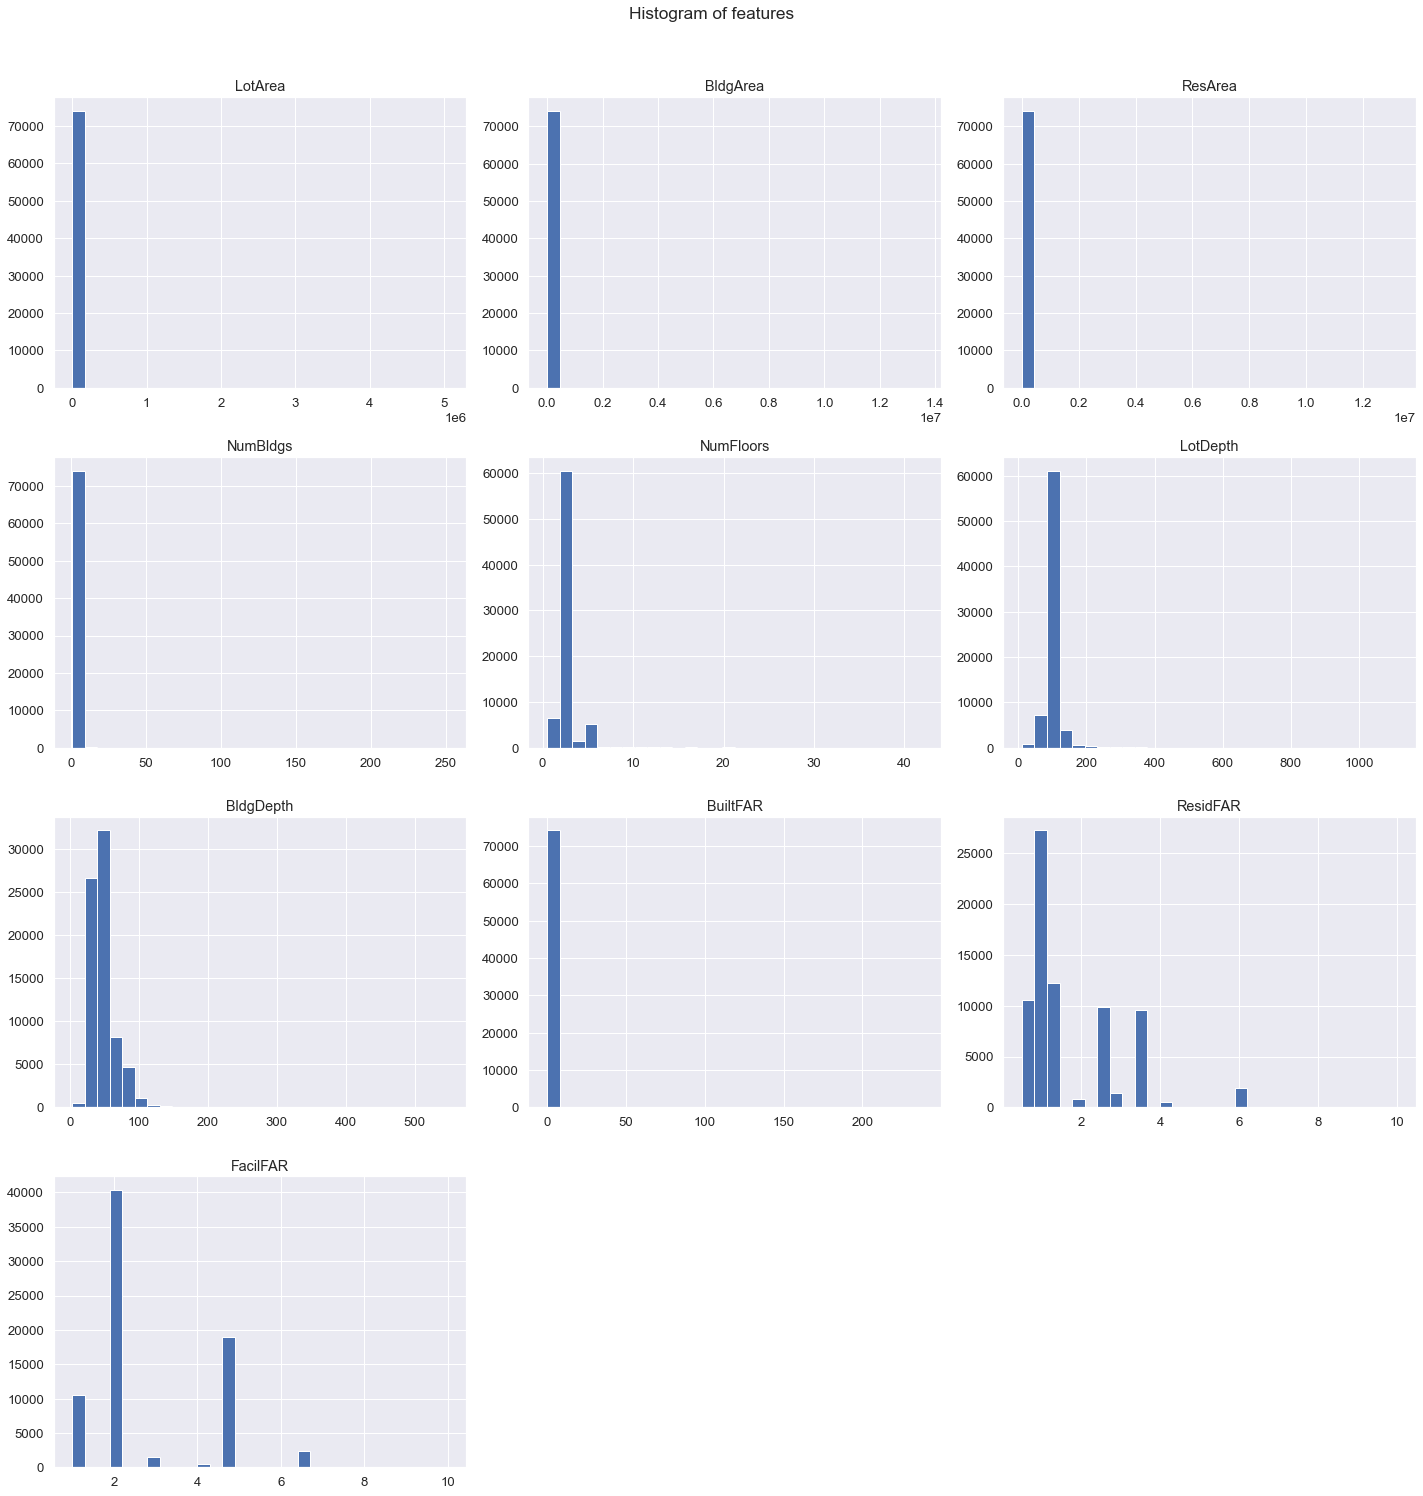

In [26]:
df.hist(bins=30, figsize=(20,20))
plt.suptitle("Histogram of features", y=1.04)
plt.tight_layout()
plt.show()

This graph was redone to exclude those dropped features. Still right skewed for some features

In [27]:
df.corr()

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
LotArea,1.000000,0.716683,0.697126,0.569469,0.226378,0.420397,0.167923,0.039064,0.030626,0.031475
BldgArea,0.716683,1.000000,0.996520,0.637119,0.401753,0.351594,0.274446,0.251014,0.110594,0.104173
ResArea,0.697126,0.996520,1.000000,0.634960,0.402663,0.348293,0.274174,0.225913,0.111445,0.104661
NumBldgs,0.569469,0.637119,0.634960,1.000000,0.053902,0.272675,0.048424,0.013802,-0.042254,-0.037867
NumFloors,0.226378,0.401753,0.402663,0.053902,1.000000,0.290620,0.549174,0.577994,0.440021,0.408788
LotDepth,0.420397,0.351594,0.348293,0.272675,0.290620,1.000000,0.299683,0.013681,0.014560,0.014024
BldgDepth,0.167923,0.274446,0.274174,0.048424,0.549174,0.299683,1.000000,0.520624,0.417760,0.407543
BuiltFAR,0.039064,0.251014,0.225913,0.013802,0.577994,0.013681,0.520624,1.000000,0.420006,0.397036
ResidFAR,0.030626,0.110594,0.111445,-0.042254,0.440021,0.014560,0.417760,0.420006,1.000000,0.917245
FacilFAR,0.031475,0.104173,0.104661,-0.037867,0.408788,0.014024,0.407543,0.397036,0.917245,1.000000


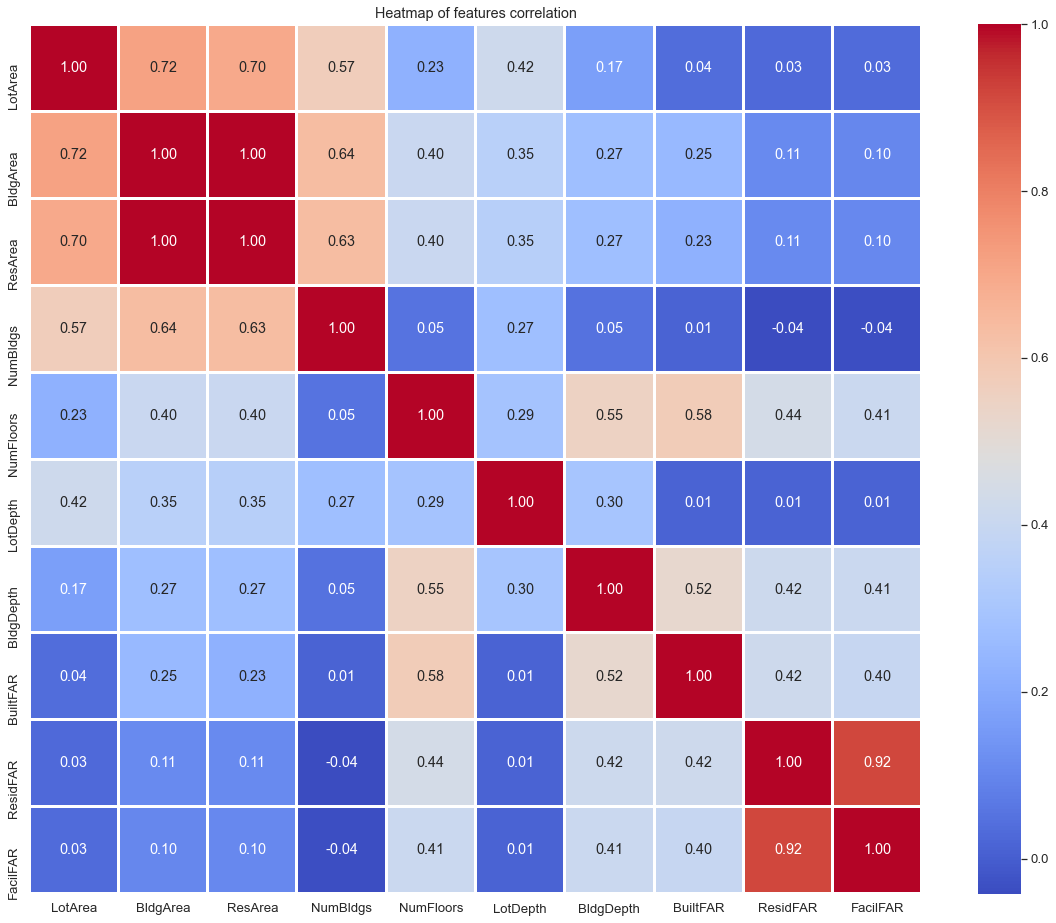

In [28]:
plt.figure(figsize=(20,16))
plt.title("Heatmap of features correlation")
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

BldgArea vs ResArea,  ResidFAR vs FacilFAR are highly correlated to each other.

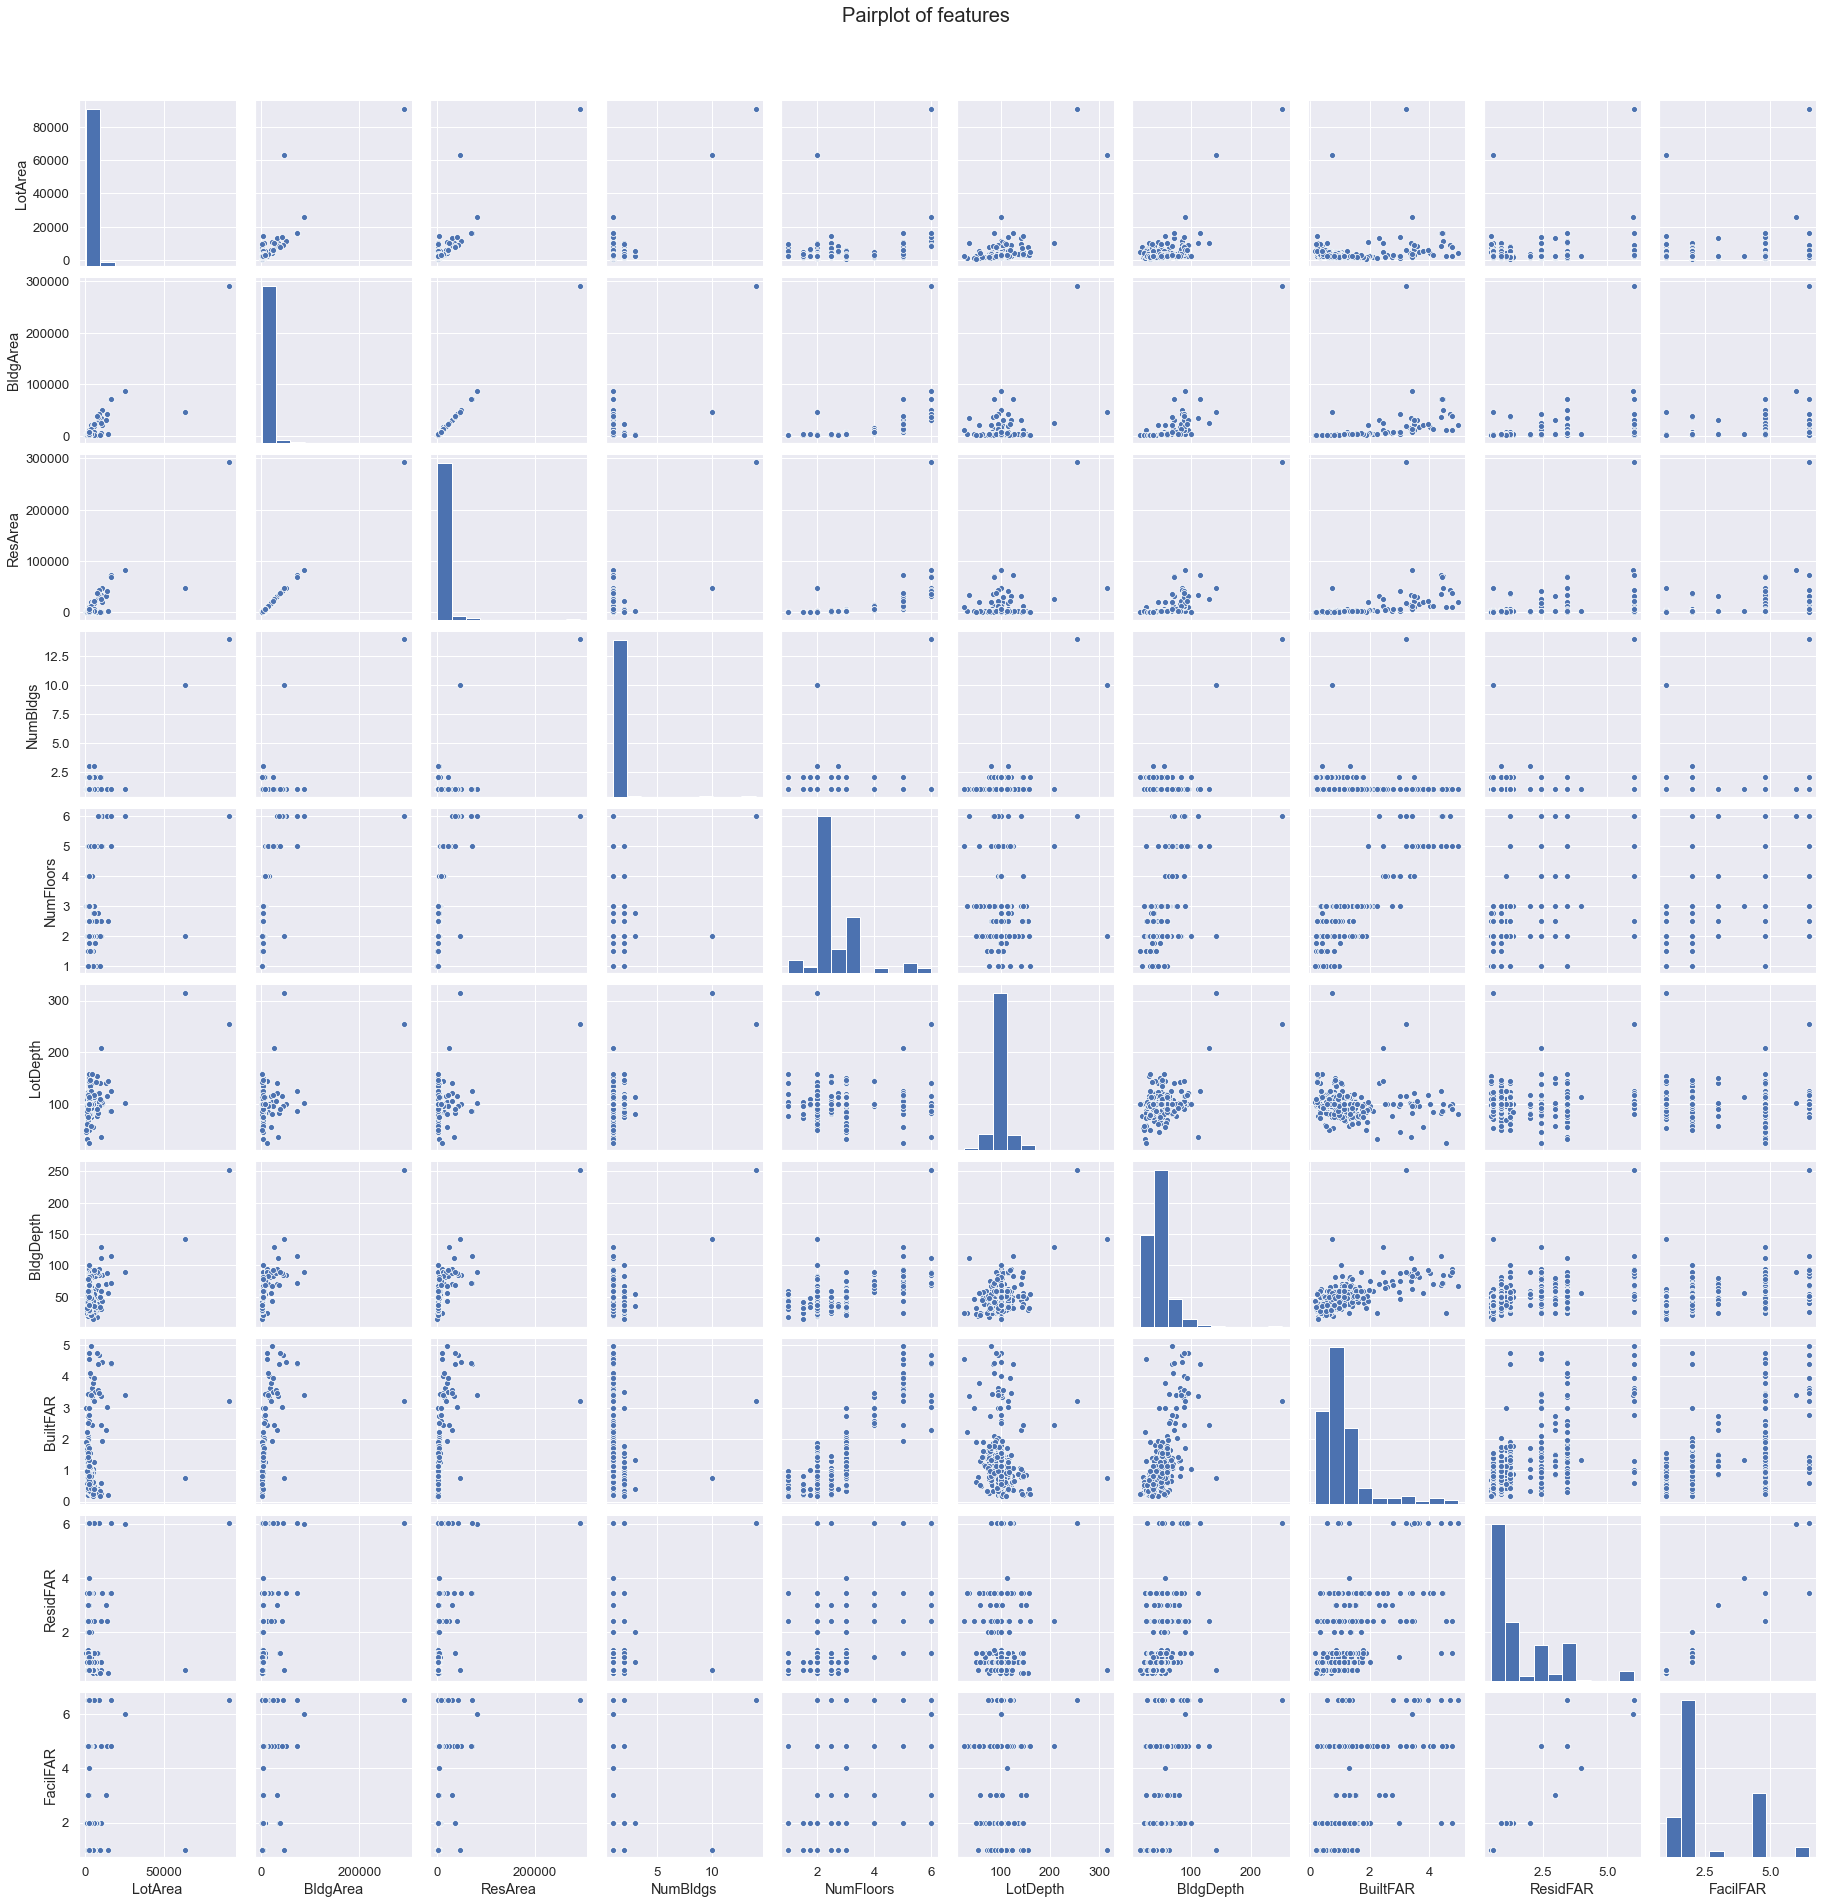

In [29]:
sns.pairplot(df.sample(500))
plt.suptitle("Pairplot of features", y=1.05, va='top', size=20)
plt.show()

We will use a small sample out from the dataset to save time and faster computation

In [30]:
df = df.copy()

In [31]:
df1 = df.sample(frac=0.05, random_state=0)

In [32]:
df1

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
64589,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0
6125,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8
19575,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0
4627,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8
73108,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0
...,...,...,...,...,...,...,...,...,...,...
1041,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8
62226,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0
50126,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0
64293,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3710 entries, 64589 to 53670
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LotArea    3710 non-null   float64
 1   BldgArea   3710 non-null   float64
 2   ResArea    3710 non-null   float64
 3   NumBldgs   3710 non-null   float64
 4   NumFloors  3710 non-null   float64
 5   LotDepth   3710 non-null   float64
 6   BldgDepth  3710 non-null   float64
 7   BuiltFAR   3710 non-null   float64
 8   ResidFAR   3710 non-null   float64
 9   FacilFAR   3710 non-null   float64
dtypes: float64(10)
memory usage: 318.8 KB


In [34]:
df1.shape

(3710, 10)

In [35]:
df1.describe()

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
count,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.00000,3710.000000
mean,3912.093261,5867.001887,5518.797305,1.254987,2.458170,100.438235,47.968871,1.143394,1.60886,2.689650
std,10344.737538,17985.009647,17795.169652,1.160692,1.167185,26.627235,19.320822,0.940854,1.16742,1.482658
min,765.000000,450.000000,450.000000,1.000000,0.500000,15.080000,13.000000,0.050000,0.50000,1.000000
25%,2136.500000,1704.250000,1368.000000,1.000000,2.000000,95.000000,36.000000,0.630000,0.90000,2.000000
50%,2500.000000,2247.000000,2000.000000,1.000000,2.000000,100.000000,45.000000,0.890000,1.10000,2.000000
75%,3435.000000,3140.750000,2774.250000,1.000000,3.000000,100.182500,54.000000,1.290000,2.43000,4.800000
max,519774.000000,332298.000000,332298.000000,64.000000,29.000000,700.000000,300.000000,11.630000,6.02000,6.500000


In [36]:
df1.reset_index(drop=True, inplace=True)

In [37]:
df1

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0
...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0


In [38]:
#Save a copy of subset data
#df1.to_csv("bronxtraining.csv", index=False)

### Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

We will be using 3 models of clustering: Hierarchical, K-Means and DBScan. Plots will be generated to make comparisons and results before chossing the final model.

### Scaling the data for training

In [39]:
X = df1.iloc[:,0:11]

In [40]:
X

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0
...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0


In [41]:
X.values

array([[4.000e+03, 1.692e+03, 1.692e+03, ..., 4.200e-01, 6.000e-01,
        1.000e+00],
       [2.500e+03, 4.095e+03, 4.095e+03, ..., 1.640e+00, 3.440e+00,
        4.800e+00],
       [2.400e+03, 1.200e+03, 1.200e+03, ..., 5.000e-01, 9.000e-01,
        2.000e+00],
       ...,
       [1.692e+03, 1.674e+03, 1.116e+03, ..., 9.900e-01, 9.000e-01,
        2.000e+00],
       [2.358e+03, 1.944e+03, 1.296e+03, ..., 8.200e-01, 6.000e-01,
        1.000e+00],
       [4.892e+03, 2.128e+03, 1.064e+03, ..., 4.300e-01, 1.250e+00,
        2.000e+00]])

In [42]:
scaler = StandardScaler()

In [43]:
X_transform = scaler.fit_transform(X)

In [44]:
X_transform

array([[ 0.00849887, -0.23216916, -0.21507596, ..., -0.76897308,
        -0.86429556, -1.13976197],
       [-0.13652194, -0.09853988, -0.08002111, ...,  0.52789663,
         1.56874747,  1.4235479 ],
       [-0.14618999, -0.25952897, -0.24272764, ..., -0.68393244,
        -0.60728397, -0.46520674],
       ...,
       [-0.21463981, -0.23317013, -0.24744865, ..., -0.16305854,
        -0.60728397, -0.46520674],
       [-0.15025057, -0.21815561, -0.23733219, ..., -0.3437699 ,
        -0.86429556, -1.13976197],
       [ 0.09473791, -0.20792349, -0.25037119, ..., -0.758343  ,
        -0.30743712, -0.46520674]])

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

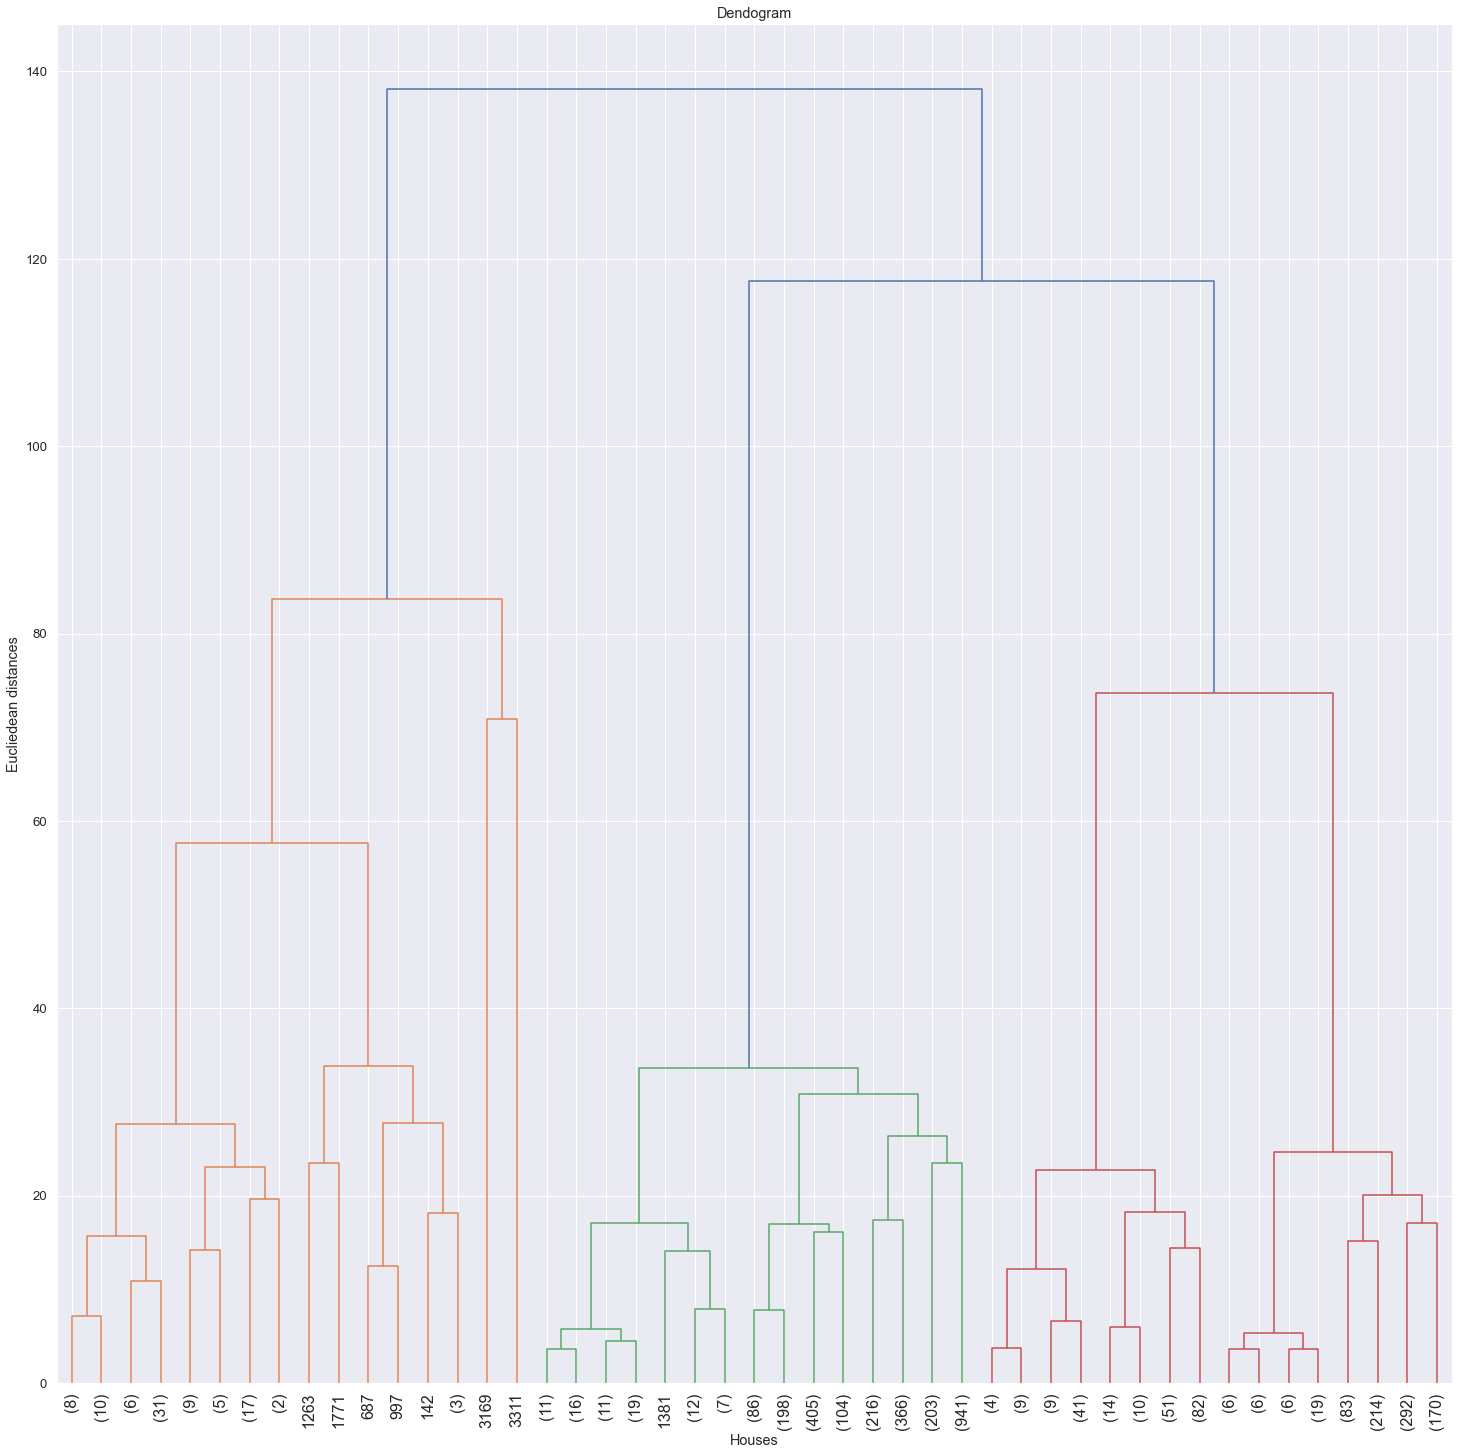

In [45]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X_transform,method='ward'),truncate_mode='level',
                           color_threshold=None,p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Houses")
plt.ylabel("Eucliedean distances")
plt.show()

We choose nclusters = 3 since highest difference height

### Fitting hierachical cluster

In [46]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [47]:
y_hc = hc.fit_predict(X_transform)

In [48]:
y_hc

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [49]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [50]:
y

,Cluster
0,2
1,1
2,2
3,1
4,2
...,...
3705,1
3706,2
3707,2
3708,2


In [51]:
y['Cluster'].unique()

array([2, 1, 0], dtype=int64)

In [52]:
y['Cluster'].value_counts()

2    2596
1    1016
0      98
Name: Cluster, dtype: int64

In [53]:
np.where(y_hc == 0)

(array([  42,  100,  132,  142,  425,  486,  515,  560,  582,  598,  681,
         687,  711,  797,  823,  829,  837,  896,  903,  907,  919,  973,
         997, 1024, 1027, 1053, 1070, 1078, 1121, 1192, 1263, 1421, 1475,
        1507, 1537, 1550, 1555, 1597, 1598, 1638, 1663, 1737, 1769, 1771,
        1776, 1791, 1794, 1806, 1813, 1962, 1997, 2011, 2030, 2059, 2078,
        2137, 2247, 2265, 2375, 2394, 2401, 2412, 2428, 2459, 2485, 2511,
        2541, 2544, 2569, 2586, 2664, 2689, 2696, 2712, 2723, 2755, 2771,
        2787, 2818, 2900, 2958, 3052, 3126, 3158, 3169, 3198, 3220, 3237,
        3262, 3307, 3311, 3363, 3387, 3420, 3455, 3595, 3612, 3636],
       dtype=int64),)

In [54]:
np.where(y_hc == 1)

(array([   1,    3,   13, ..., 3689, 3690, 3705], dtype=int64),)

In [55]:
np.where(y_hc == 2)

(array([   0,    2,    4, ..., 3707, 3708, 3709], dtype=int64),)

In [56]:
newdf = pd.concat([df1,y],axis=1)

In [57]:
newdf

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Cluster
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0,2
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8,1
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0,2
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8,1
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8,1
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0,2
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0,2
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0,2


In [58]:
newdf["Cluster"].value_counts()

2    2596
1    1016
0      98
Name: Cluster, dtype: int64

In [59]:
meandf = newdf.groupby(by='Cluster').mean()

In [60]:
meandf

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
Cluster,,,,,,,,,,
0,32548.540816,94210.234694,92732.285714,2.071429,6.438776,151.512857,105.316939,3.911122,3.753265,4.953061
1,3174.352362,6598.432087,6248.693898,1.134843,2.936270,97.545423,56.014951,1.703701,3.093996,4.784646
2,3119.786980,2245.750000,1940.793914,1.271186,2.120786,99.642311,42.654954,0.819622,0.946668,1.784284


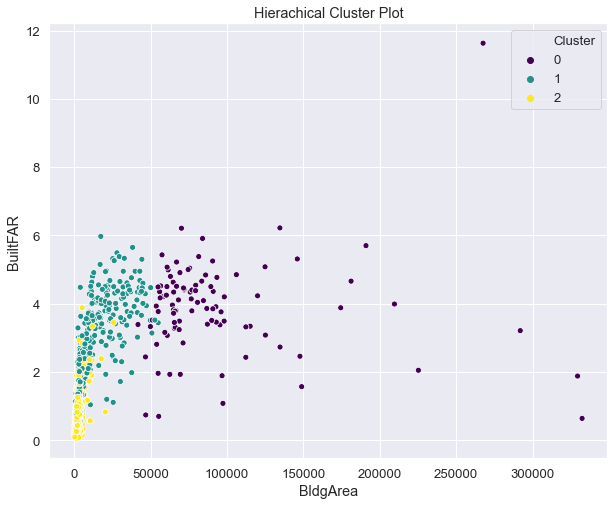

In [61]:
x_axis = newdf['BldgArea']
y_axis = newdf['BuiltFAR']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Hierachical Cluster Plot')
plt.show()

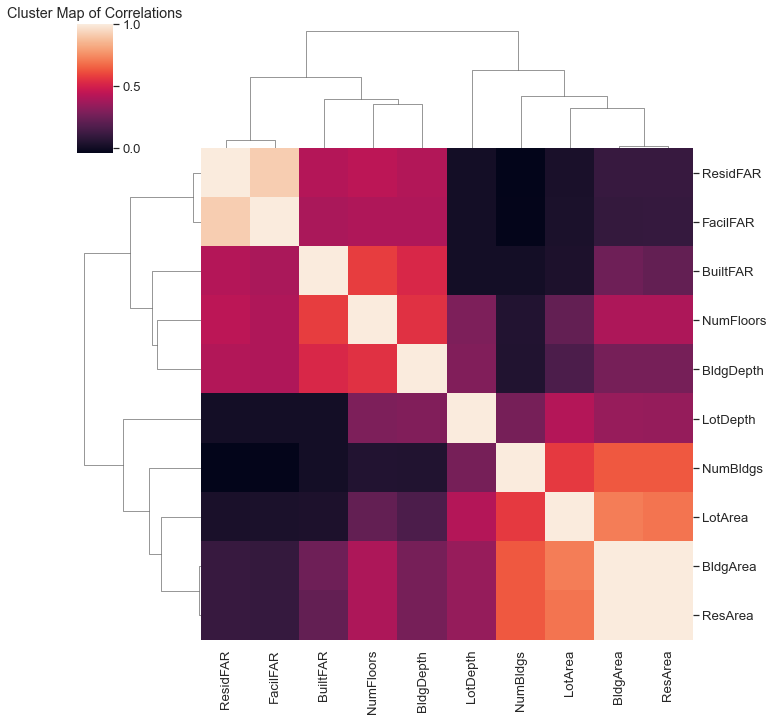

In [62]:
sns.clustermap(df.corr())
plt.title("Cluster Map of Correlations")
plt.show()

**Analysis: Based on cluster plot, there are 3 clusters found.**
    
Cluster 0: Largest Sized Buildings based on high values of area
    
Cluster 1: Medium Sized Buildings based on BldgArea value
    
Cluster 2: Small Sized Buildings based on BldgArea value

## K-Means Clustering Method

### Using Elbow Method to find optimal number of clusters

In [63]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0, n_init=10)
    kmeans.fit(X_transform)
    wcss.append(kmeans.inertia_)

In [64]:
wcss

[37099.999999999876,
 25584.590147780338,
 20428.26509162942,
 15841.129949552638,
 13407.952781423644,
 11326.132619965483,
 10614.038214797878,
 9397.209301852517,
 8876.393122036905,
 8461.425393352614]

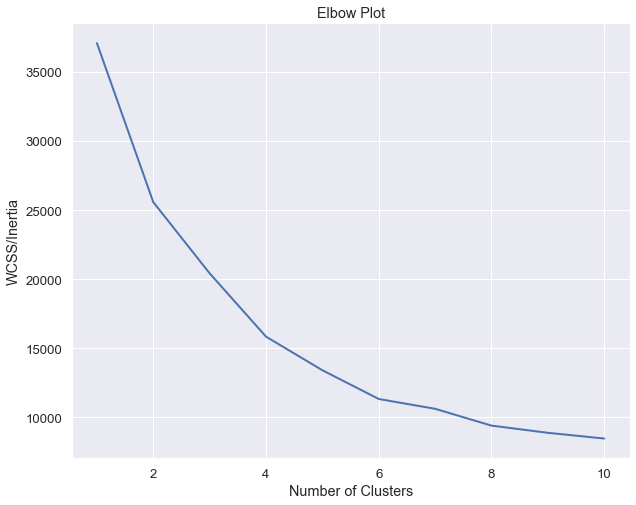

In [65]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS/Inertia")
plt.show()

Choose number of clusters = 4

### Execute K-Means after determining the suitable cluster

In [66]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0, n_init=10)

In [67]:
kmeans.fit(X_transform)

KMeans(n_clusters=4, random_state=0)

### Results

In [68]:
df_segm_kmeans = df1.copy()

In [69]:
df_segm_kmeans

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0
...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0


In [70]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [71]:
df_segm_kmeans

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Segment K-Means
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0,1
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8,3
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0,1
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8,3
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8,3
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0,1
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0,1
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0,1


In [72]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [73]:
df_segm_analysis

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
Segment K-Means,,,,,,,,,,
0,180035.833333,237477.500000,237477.500000,15.500000,6.833333,426.120000,146.333333,1.738333,3.196667,5.083333
1,3118.099037,2236.654721,1933.893256,1.271291,2.120062,99.642173,42.637480,0.818609,0.946686,1.784200
2,12799.708502,47828.773279,46730.153846,1.093117,5.696356,113.152955,91.912915,3.990688,3.509231,4.828340
3,2529.763341,3159.960557,2887.554524,1.153132,2.517691,96.924490,50.742181,1.301125,3.046705,4.785963


In [ ]:
#df_segm_kmeans.groupby(['Segment K-Means','NumFloors']).count()

In [ ]:
#df_segm_kmeans.groupby(['Segment K-Means','NumFloors']).size()

**Analysis:** 

Cluster 0 has largest areas, floors and numbers = Extra Large (XL)

Cluster 1 has average areas values overall = Medium 1 (M1)

Cluster 2 has large areas overall = Large (L)

Cluster 3 has average areas values overall = Medium 2 (M2)


In [74]:
df_segm_analysis.rename({0: 'XL',
                         1: 'M1',
                         2: 'L',
                         3: 'M2',
                         },inplace=True)

In [75]:
df_segm_analysis

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
Segment K-Means,,,,,,,,,,
XL,180035.833333,237477.500000,237477.500000,15.500000,6.833333,426.120000,146.333333,1.738333,3.196667,5.083333
M1,3118.099037,2236.654721,1933.893256,1.271291,2.120062,99.642173,42.637480,0.818609,0.946686,1.784200
L,12799.708502,47828.773279,46730.153846,1.093117,5.696356,113.152955,91.912915,3.990688,3.509231,4.828340
M2,2529.763341,3159.960557,2887.554524,1.153132,2.517691,96.924490,50.742181,1.301125,3.046705,4.785963


In [76]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'XL',
                                                                  1: 'M1',
                                                                  2: 'L',
                                                                  3: 'M2'})

In [77]:
df_segm_kmeans

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Segment K-Means,Labels
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0,1,M1
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8,3,M2
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0,1,M1
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8,3,M2
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0,1,M1
...,...,...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8,3,M2
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0,1,M1
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0,1,M1
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0,1,M1


### Plot the clusters

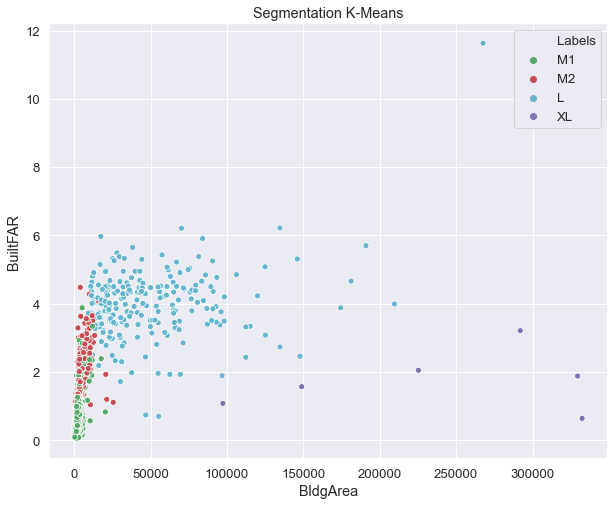

In [78]:
x_axis = df_segm_kmeans['BldgArea']
y_axis = df_segm_kmeans['BuiltFAR']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

In [79]:
# x_axis = df_segm_kmeans['BldgArea']
# y_axis = df_segm_kmeans['BuiltFAR']
# z_axis = df_segm_kmeans['BldgDepth']

# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

# ax.set_xlabel('BldgArea')
# ax.set_ylabel('BuiltFAR')
# ax.set_zlabel('BldgDepth')

# plt.show()

## DBSCAN method

In [80]:
epsilon = 0.3
minimumSamples = 50
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_transform)

In [81]:
labels= db.labels_
labels

array([-1, -1, -1, ...,  0,  1, -1], dtype=int64)

In [82]:
y = pd.DataFrame(labels,columns=['Cluster'])

In [83]:
y

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
3705,-1
3706,-1
3707,0
3708,1


In [84]:
y.value_counts()

Cluster
-1         2884
 0          662
 2           94
 1           70
dtype: int64

In [85]:
dbdf = pd.concat([df1,y],axis=1)

In [86]:
dbdf

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Cluster
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0,-1
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8,-1
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0,-1
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8,-1
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8,-1
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0,-1
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0,0
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0,1


In [87]:
dbdf["Cluster"].value_counts()

-1    2884
 0     662
 2      94
 1      70
Name: Cluster, dtype: int64

-1 are Outliers, hence need to be removed from table

In [88]:
dbdf

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Cluster
0,4000.0,1692.0,1692.0,2.0,2.0,100.00,30.0,0.42,0.60,1.0,-1
1,2500.0,4095.0,4095.0,1.0,3.0,100.00,65.0,1.64,3.44,4.8,-1
2,2400.0,1200.0,1200.0,1.0,2.0,60.00,25.0,0.50,0.90,2.0,-1
3,3822.0,1920.0,1280.0,2.0,3.0,101.00,32.0,0.50,2.43,4.8,-1
4,2052.0,1600.0,1200.0,1.0,2.0,54.00,20.0,0.78,0.60,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
3705,2311.0,3960.0,3960.0,1.0,3.0,92.59,50.0,1.71,2.43,4.8,-1
3706,4750.0,2112.0,2112.0,1.0,2.0,95.00,48.0,0.44,0.90,2.0,-1
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.0,0.99,0.90,2.0,0
3708,2358.0,1944.0,1296.0,1.0,2.0,100.00,36.0,0.82,0.60,1.0,1


In [89]:
db2 = dbdf[dbdf["Cluster"] != -1]

In [90]:
db2

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR,Cluster
8,1710.0,1539.0,1188.0,1.0,2.0,95.00,33.00,0.90,0.90,2.0,0
9,1699.0,1728.0,1152.0,1.0,2.0,90.00,32.00,1.02,0.90,2.0,0
12,1900.0,1980.0,1440.0,1.0,2.0,100.00,36.00,1.04,0.90,2.0,0
14,4257.0,2484.0,2484.0,1.0,2.0,100.00,46.33,0.58,0.90,2.0,0
17,2720.0,1820.0,1280.0,1.0,2.0,109.98,35.00,0.67,0.90,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3696,1710.0,1849.0,1296.0,1.0,2.0,95.00,34.00,1.08,0.90,2.0,0
3699,3092.0,1782.0,1188.0,1.0,2.0,100.00,30.00,0.58,0.90,2.0,0
3700,1966.0,1975.0,1406.0,1.0,2.0,100.00,37.00,1.00,1.25,2.0,0
3707,1692.0,1674.0,1116.0,1.0,2.0,94.00,31.00,0.99,0.90,2.0,0


In [91]:
db2['Cluster'].value_counts()

0    662
2     94
1     70
Name: Cluster, dtype: int64

In [92]:
meandb = db2.groupby(by='Cluster').mean()

In [93]:
meandb

,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,FacilFAR
Cluster,,,,,,,,,,
0,2413.030211,1975.611782,1601.099698,1.0,1.995227,99.116526,40.402175,0.840136,1.011329,2.0
1,2464.071429,1662.914286,1360.100000,1.0,2.000000,98.834857,35.477429,0.684571,0.598571,1.0
2,2483.595745,1567.340426,1414.872340,2.0,1.997340,98.965319,37.320957,0.636277,0.944149,2.0


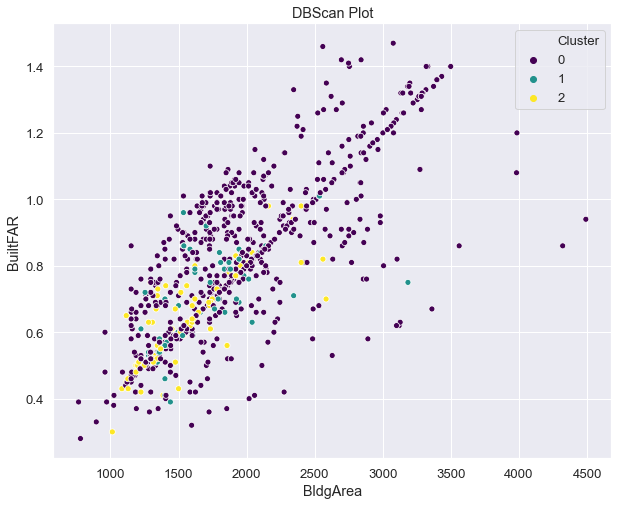

In [94]:
x_axis = db2['BldgArea']
y_axis = db2['BuiltFAR']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=db2['Cluster'],palette='viridis')
plt.title('DBScan Plot')
plt.show()

**Analysis of DBSCAN Plot:**
    
The clusters 0, 1 and 2 are totally mixed up together, hence the model is unable to differentiate the data

### A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

We would recommend Hierarchical Model since there is more clearer separation of clusters and the mean values of building features are clearly seen.

### Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise

The summary concludes with the best clustering model to be implemented with clear separation of clusters.

### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model

There are other clustering methods can be used: Mean Shift, HDBSCAN, OPTICS methods which need to be explored in future. Another method is compress the dataset using Principal Component Analysis and then use the 3 models to see any result improvements.